The minimum distance is 3.80


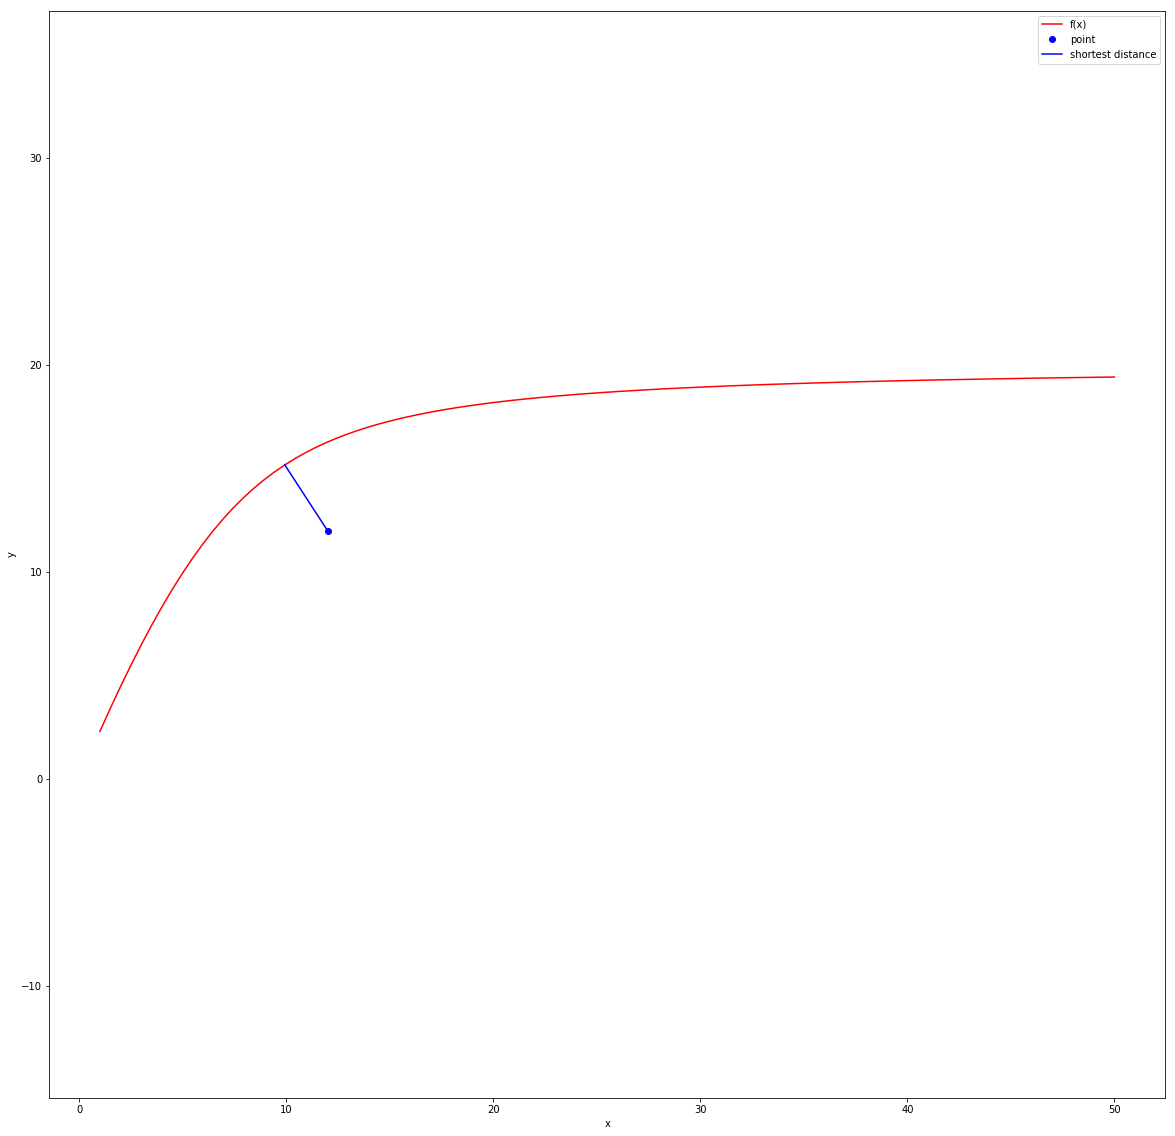

In [5]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import numpy as np
from phLigands.Model import MGvH
import matplotlib.pyplot as plt
from scipy.optimize import fmin_cobyla

P = (12, 12)

fu = MGvH()
params = {'Ab': 20, 'k': 0.02, 'n': 5}


def f(x):
    return fu.eval(params, x)

def objective(X):
    x,y = X
    return np.sqrt((x - P[0])**2 + (y - P[1])**2)

def c1(X):
    x,y = X
    return y - f(x)

X = fmin_cobyla(objective, x0=[0.5,0.5], cons=[c1])

print('The minimum distance is {0:1.2f}'.format(objective(X)))

x = np.linspace(1, 50, 100)

plt.figure(figsize=(20,20))
plt.plot(x, f(x), 'r-', label='f(x)')
plt.plot(P[0], P[1], 'bo', label='point')
plt.plot([P[0], X[0]], [P[1], X[1]], 'b-', label='shortest distance')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()
# plt.savefig('dist2cobyla/min-dist-p-func.png')